In [1]:
##importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import random
import pickle

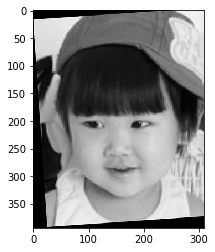

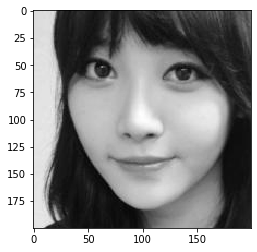

In [2]:
#importing dataset and converting into grayscale array
current_dir = os.getcwd()
data_dir = os.path.join(current_dir, "Gender")
CATEGORIES = ["Female","Male"]

for choose in CATEGORIES:
    path = os.path.join(data_dir, choose) 
    for image in os.listdir(path):
        image_array = cv2.imread(os.path.join(path, image), cv2.IMREAD_GRAYSCALE) #converting into greyscale and storing in array
        plt.imshow(image_array, cmap='gray')
        plt.show()
        break
    break
    
test_dir = os.path.join(current_dir, "Gender_test")
for choose in CATEGORIES:
    path = os.path.join(test_dir, choose) 
    for test_image in os.listdir(path):
        test_image_array = cv2.imread(os.path.join(path, test_image), cv2.IMREAD_GRAYSCALE) #converting into greyscale and storing in array
        plt.imshow(test_image_array, cmap='gray')
        plt.show()
        break
    break


In [3]:
#checking out the shape of the image displayed above
print(image_array.shape)
print(test_image_array.shape)

(394, 309)
(200, 200)


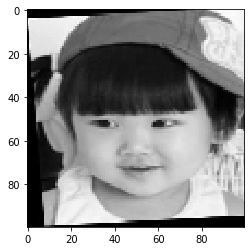

In [4]:
#resizing all image into 100*100 pixels
image_size = 100
new_imageArray = cv2.resize(image_array, (image_size, image_size))
#viewing new resized image
plt.imshow(new_imageArray, cmap='gray')
plt.show()

In [5]:
#creating training data and test data
train_data = []
def create_trainData():
    for choose in CATEGORIES:
        path = os.path.join(data_dir, choose) 
        class_number = CATEGORIES.index(choose)
        for image in os.listdir(path):
            try:
                image_array = cv2.imread(os.path.join(path, image), cv2.IMREAD_GRAYSCALE) 
                new_imageArray = cv2.resize(image_array, (image_size, image_size))
                train_data.append([new_imageArray, class_number])
            except Exception as e:
                pass
create_trainData()

test_data = []
def create_testData():
    for choose in CATEGORIES:
        path = os.path.join(test_dir, choose) 
        class_number = CATEGORIES.index(choose)
        for image in os.listdir(path):
            try:
                test_array = cv2.imread(os.path.join(path, image), cv2.IMREAD_GRAYSCALE) 
                test_imageArray = cv2.resize(image_array, (image_size, image_size))
                test_data.append([test_imageArray, class_number])
            except Exception as e:
                pass
create_testData()

In [6]:
print(len(train_data))
print(len(test_data))

13928
2000


In [7]:
##suffling data for better accuracy
random.shuffle(train_data)
random.shuffle(test_data)

In [8]:
## for traning data 
train_feature =[]
train_label = [] ## array list

for feature, label in train_data:
    train_feature.append(feature)
    train_label.append(label)

## creating train_feature in an array
train_feature = np.array(train_feature).reshape(-1,image_size,image_size,1)

## saving the data in binary format

pickle_out = open("train_feature.pickle","wb")
pickle.dump(train_feature, pickle_out)
pickle_out.close()

pickle_out = open("train_label.pickle","wb")
pickle.dump(train_label, pickle_out)
pickle_out.close()


In [9]:
## for testing data 
test_feature =[]
test_label = [] ## array list

for feature, label in train_data:
    test_feature.append(feature)
    test_label.append(label)

## creating test_feature in an array
test_feature = np.array(test_feature).reshape(-1,image_size,image_size,1)

## saving the data in binary format

pickle_out = open("test_feature.pickle","wb")
pickle.dump(train_feature, pickle_out)
pickle_out.close()

pickle_out = open("test_label.pickle","wb")
pickle.dump(train_label, pickle_out)
pickle_out.close()
